In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
## We will use machine learning via Sklean to perform linear regression analysis.
## First, we'll import our cleaned, unsplit data for this demonstration. 
austin_change = 'https://raw.githubusercontent.com/dianahandler/Final_Module20_Group3/main/autinHousingData_cleaned_citynamechanged.csv'
austin_no_change = 'https://raw.githubusercontent.com/dianahandler/Final_Module20_Group3/main/autinHousingData_cleaned_nochangecity.csv'
df_ac = pd.read_csv(austin_change)
df_nc = pd.read_csv(austin_no_change)

In [3]:
df_ac.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,zip_rank,median_zip,pr_sqft
0,111373431,austin,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,1,...,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,8,289500.0,117.0
1,120900430,austin,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,1,...,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,8,289500.0,167.0
2,2084491383,austin,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,1,...,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,8,289500.0,173.0
3,120901374,austin,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,1,...,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,8,289500.0,143.0
4,60134862,austin,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,1,...,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,8,289500.0,113.0


In [4]:
df_nc.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,zip_rank,median_zip,pr_sqft
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,1,...,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,8,289500.0,117.0
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,1,...,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,8,289500.0,167.0
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,1,...,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,8,289500.0,173.0
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,1,...,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,8,289500.0,143.0
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,1,...,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,8,289500.0,113.0


## Pearson correlation coefficient analysis

As the above dataframes show, there are more than 40 features to consider in predicting property prices. With correlation analysis, as mentioned in 15.7.1 (2021), we can generate Pearson correlation coefficients to better determine numerically how each feature is related to those prices. To do this with dataframe columns, we will need corr(), which happens to generate Pearson correlation coefficients by default ('pandas.DataFrame.corr', 2021).

Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

We should also note that this correlation analysis has been conducted elsewhere in the group repository, but only as a demonstration. We will be recreating this process here since it is key for our later regression analysis.

Source: https://github.com/dianahandler/Final_Module20_Group3/commit/7c2f33ca7364dfbb40c21b7be7651fa2b5ad51de?branch=7c2f33ca7364dfbb40c21b7be7651fa2b5ad51de#diff-1c8bade9d6a619027f877dbf242cf157c76dbcd45194479d71bc5e565ffa1a09

In [5]:
## Let's look at the column names for future reference.
df_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12933 entries, 0 to 12932
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zpid                      12933 non-null  int64  
 1   city                      12933 non-null  object 
 2   streetAddress             12933 non-null  object 
 3   zipcode                   12933 non-null  int64  
 4   description               12933 non-null  object 
 5   latitude                  12933 non-null  float64
 6   longitude                 12933 non-null  float64
 7   propertyTaxRate           12933 non-null  float64
 8   garageSpaces              12933 non-null  int64  
 9   hasAssociation            12933 non-null  int64  
 10  hasCooling                12933 non-null  int64  
 11  hasGarage                 12933 non-null  int64  
 12  hasHeating                12933 non-null  int64  
 13  hasSpa                    12933 non-null  int64  
 14  hasVie

In [6]:
df_ac['latestPriceSource'].head(10)

0    Coldwell Banker United, Realtors - South Austin
1                                     Agent Provided
2                                     Agent Provided
3                                     Agent Provided
4                                     Agent Provided
5                                    Broker Provided
6                                    Broker Provided
7                                     Agent Provided
8                                     Agent Provided
9                                     Agent Provided
Name: latestPriceSource, dtype: object

While most of the data is numerical, we do find 7 columns of non-numerical data: city, streetAddress, description, hometype, latest saledate, latestPriceSource, and homeImage. 

We will certainly convert city names and hometypes, since we want to know the impact of home type or city location on price values. 

Price source also might be a factor, considering that perhaps more established and reputable price providers may charge slightly more than other providers. 

While the looks of a house may influence pricing (i.e. how subjectively good it looks), we definitely feel that home image url's aren't good indicators of price to a machine, unless our machine can read those url's and judge the quality of thousands of homes based on their respective images. Especially with the scope of our project, where we feed numerical data into a machine learning model to arrive at some output.

While we don't have a solid reason to consider latest sale date, street address, and house description as a factors for pricing, we don't have any reason to reject them either.

In [7]:
## From 17.6.2 (2021), we can use sklearn's LabelEncoder to convert strings into numbered data for our
## machine learning model to interpret easier.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
## This is for altered-city data.
df1 = df_ac.copy()
df1['city'] = le.fit_transform(df1['city'])
df1['streetAddress'] = le.fit_transform(df1['streetAddress'])
df1['homeType'] = le.fit_transform(df1['homeType'])
df1['latestPriceSource'] = le.fit_transform(df1['latestPriceSource'])
df1['description'] = le.fit_transform(df1['description'])

In [8]:
## This is for unaltered-city data.
df2 = df_nc.copy()
df2['city'] = le.fit_transform(df2['city'])
df2['streetAddress'] = le.fit_transform(df2['streetAddress'])
df2['homeType'] = le.fit_transform(df2['homeType'])
df2['latestPriceSource'] = le.fit_transform(df2['latestPriceSource'])
df2['description'] = le.fit_transform(df2['description'])

In [9]:
## Now that we encoded our label string data, it's time for correlation analysis.
## For this project, 'latestPrice' is our output we want to predict. So for our corr() function,
## we will only need to look at the 'latestPrice' column of the outputted correlation dataframe.
correlations = df1.corr()['latestPrice']
correlations.head()

zpid             0.010168
city                  NaN
streetAddress   -0.031023
zipcode         -0.238276
description      0.005282
Name: latestPrice, dtype: float64

In [10]:
## Looking at this series of coefficients, we can sort them in descending order to evaluate them better.
correlations.sort_values(ascending=False)

latestPrice                 1.000000
median_zip                  0.730931
zip_rank                    0.691525
pr_sqft                     0.576027
livingAreaSqFt              0.496778
numOfBathrooms              0.412107
avgSchoolRating             0.384555
lotSizeSqFt                 0.296135
MedianStudentsPerTeacher    0.285408
numOfBedrooms               0.270606
numOfStories                0.208965
numOfPhotos                 0.160217
garageSpaces                0.129184
parkingSpaces               0.121176
numOfParkingFeatures        0.111064
numOfElementarySchools      0.105525
hasView                     0.102876
hasSpa                      0.102659
hasGarage                   0.093460
latitude                    0.085285
numOfMiddleSchools          0.084401
patioporch                  0.080889
latest_saleyear             0.078021
windowfeatures              0.075416
avgSchoolSize               0.068801
latestPriceSource           0.060768
security                    0.054198
n

Notice in df1 that 'city' has a null correlation coefficient. That is because all city values for df_ac (and by extension, df1) are all set to 'Austin'. This is not the case for df_nc (and by extension, df2), which includes a few areas like Pflugerville that are adjacent to Austin, Texas. Otherwise, data in df_nc is identical to df_ac data.

In [11]:
## Let's run a similar correlation analysis on our other label-encoded dataframe.
correlations2 = df2.corr()['latestPrice']
correlations2.sort_values(ascending=False)

latestPrice                 1.000000
median_zip                  0.730931
zip_rank                    0.691525
pr_sqft                     0.576027
livingAreaSqFt              0.496778
numOfBathrooms              0.412107
avgSchoolRating             0.384555
lotSizeSqFt                 0.296135
MedianStudentsPerTeacher    0.285408
numOfBedrooms               0.270606
numOfStories                0.208965
numOfPhotos                 0.160217
garageSpaces                0.129184
parkingSpaces               0.121176
numOfParkingFeatures        0.111064
numOfElementarySchools      0.105525
hasView                     0.102876
hasSpa                      0.102659
hasGarage                   0.093460
latitude                    0.085285
numOfMiddleSchools          0.084401
patioporch                  0.080889
latest_saleyear             0.078021
windowfeatures              0.075416
avgSchoolSize               0.068801
latestPriceSource           0.060768
security                    0.054198
n

In [12]:
## We'll then concatenate our two correlation series into a dataframe by passing a dictionary that contains key-value
## pairs for our data.
## Source: https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
complete = pd.DataFrame({'All Austin': correlations, 'No Change': correlations2})
complete

,All Austin,No Change
zpid,0.010168,0.010168
city,NaN,-0.064157
streetAddress,-0.031023,-0.031023
zipcode,-0.238276,-0.238276
description,0.005282,0.005282
latitude,0.085285,0.085285
longitude,-0.198968,-0.198968
propertyTaxRate,-0.059908,-0.059908
garageSpaces,0.129184,0.129184
hasAssociation,-0.093080,-0.093080


In [13]:
## Since data for both df_ac and df_nc is identical outside of 'city' values, we see that correlation
## coefficient figures are also virtually identical for both dataframes.

With reference to 15.7.1 (2021), we'll pay particular attention to coefficients with magnitudes of at least 0.5, which indicate at least moderate correlation to 'latestPrice'. Preferrably, we'd want to look at magnitude 0.7 or higher coefficients for strong correlation.

By this reference, only 3 features are found to be at least moderately correlated to price: median_zip,
zip_rank, and pr_sqft. However, that's because those features are dependent on 'latestPrice' data, as seen in the below code: 
#### pr_sqft
df['pr_sqft'] = df.apply(lambda x: round( (x['latestPrice'] / x['livingAreaSqFt'] ), 0), axis=1 )

#### median_zip
df['median_zip'] = df['zipcode'].apply(lambda x: round(df.loc[df['zipcode']==x]['latestPrice'].median(), 0))

#### zip_rank
zipsorted = pd.DataFrame(df.groupby('zipcode')['latestPrice'].median().sort_values(ascending=True)
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1
df['zip_rank'] = df['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

Source: https://github.com/dianahandler/Final_Module20_Group3/blob/main/Housing_Price_Data.ipynb

Given this dependence on our output variable, we have some doubts over using these top 3 features. After some further thought, however, we could still use pr_sqft in our analysis, seeing as some housebuyers may want to maximize the amount of living space within their budget. Same goes for zip_rank, in that maybe there are some zip codes in Austin that are more attractive for prospective buyers than others.

Moving on from moderate correlation, we have these top 3 "weakly" correlated features: livingAreaSqFt (about 0.4968), numOfBathrooms (about 0.4121), and avgSchoolRating (about 0.3846). We also have a plethora of features with coefficient magnitudes of less than 0.3, while are considered to be "very weakly" correlated (15.7.1, 2021) to pricing. Despite this, seeing that the vast majority of pricing features fall outside of 'moderate' correlation, we cannot simpy rule them out of our in-depth analysis.

For demonstration sake, however, we will use the top 10 correlated features with respect to pricing for our machine learning predictions. In subsequent runs, we will look to input more applicable features and perhaps use other machine learning processes to produce our final predictions.

In [14]:
## We'll prepare our demonstration input data by isolating our dataframe's top 10 correlated columns
X_demo = df_ac[['median_zip', 'zip_rank', 'pr_sqft', 'livingAreaSqFt', 'numOfBathrooms', 'avgSchoolRating', 'lotSizeSqFt', 
              'MedianStudentsPerTeacher', 'numOfBedrooms', 'numOfStories']]
X_demo.head()

,median_zip,zip_rank,pr_sqft,livingAreaSqFt,numOfBathrooms,avgSchoolRating,lotSizeSqFt,MedianStudentsPerTeacher,numOfBedrooms,numOfStories
0,289500.0,8,117.0,2601.0,3.0,2.666667,6011.0,14,4,2
1,289500.0,8,167.0,1768.0,2.0,2.666667,6185.0,14,4,1
2,289500.0,8,173.0,1478.0,2.0,3.000000,7840.0,14,3,1
3,289500.0,8,143.0,1678.0,2.0,2.666667,6098.0,14,3,1
4,289500.0,8,113.0,2132.0,3.0,4.000000,6708.0,14,3,2


In [15]:
## Our output data will simply be our price data.
y_demo = df_ac['latestPrice']

In [16]:
## Now we can split our demo data into training and testing data, as we've done in
## 17.3.1 (2021). 
X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(X_demo,
y_demo, random_state=1)
## Let's look at the dimensions of our training and testing data.

In [17]:
X_train_demo.shape

(9699, 10)

In [18]:
X_test_demo.shape

(3234, 10)

In [19]:
y_train_demo.shape

(9699,)

In [20]:
y_test_demo.shape

(3234,)

In [21]:
## We see that our testing data has 3,234 samples while our training data has 9,699 samples.
## Compared to the over 12,000 entries of Austin housing data, our testing and training data
## will be easier for our linear regression model to handle.

In [22]:
## Like we've done in 17.2.3 (2021), we'll use the training data to train our 
## Sklearn linear regression model.
model = LinearRegression()
model.fit(X_train_demo, y_train_demo)

LinearRegression()

In [23]:
## With our model ready, we'll use it to predict prices using testing data, similar to what
## we've done in 17.3.1 (2021).
y_pred_demo = model.predict(X_test_demo) 

In [24]:
## W
y_pred_demo

array([626573.11338496, 330472.21590708, 308811.69135354, ...,
       584154.77242535, 310513.11634789, 330179.13460169])

In [25]:
y_test_demo

1253      725000.0
7214      365000.0
1739      315000.0
5550      240000.0
12118     254900.0
           ...    
11741    1399999.0
10243     349900.0
12781     625000.0
4411      300000.0
3374      304999.0
Name: latestPrice, Length: 3234, dtype: float64

In [26]:
testing = pd.DataFrame({'Prediction': y_pred_demo, 'Actual test': y_test_demo})
testing.head()

,Prediction,Actual test
1253,626573.113385,725000.0
7214,330472.215907,365000.0
1739,308811.691354,315000.0
5550,227614.145424,240000.0
12118,366719.778330,254900.0


In [27]:
y_demo.iloc[1253]

725000.0

In [28]:
## Notice that our testing output data includes indices that reference data from our original
## demo output data.

In [29]:
## To gauge the model's predictive accuracy, we can start by calculating the deviation between 
## predicted and actual test values.
testing['Raw Error'] = (testing['Prediction'] - testing['Actual test'])
testing.head()

,Prediction,Actual test,Raw Error
1253,626573.113385,725000.0,-98426.886615
7214,330472.215907,365000.0,-34527.784093
1739,308811.691354,315000.0,-6188.308646
5550,227614.145424,240000.0,-12385.854576
12118,366719.778330,254900.0,111819.778330


In [30]:
## We are looking to measure mean squared error (MSE) as one way to gauge our regression 
## model's accuracy, as suggested here: https://stats.stackexchange.com/questions/142873/how-to-determine-the-accuracy-of-regression-which-measure-should-be-used
## A quick way to calculate MSE is with sklearn metrics, as seen here:
## https://www.pythonpool.com/mean-squared-error-python/
from sklearn.metrics import mean_squared_error
mean_squared_error(testing['Actual test'], testing['Prediction'])
print(mean_squared_error(testing['Actual test'], testing['Prediction']))

5101588574.185439


In [31]:
## Double checking the math, by passing lists of actual and predicted values into
## the MSE metric function:
Pred_list = testing['Prediction'].to_list()
AT_list = testing['Actual test'].to_list()
mean_squared_error(AT_list, Pred_list)
print(mean_squared_error(AT_list, Pred_list))

5101588574.185439


In [32]:
## From the MSE, we can calculate root MSE by setting the squared parameter to 'false'.
RootMSE = mean_squared_error(AT_list, Pred_list, squared=False)
print(RootMSE)

71425.40566342931


In [33]:
## Another metric we can calculate is mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(AT_list, Pred_list)
print(MAE)

46144.81263357394


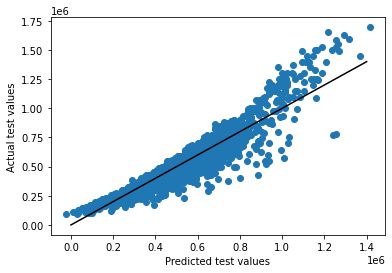

In [37]:
## We can also plot the test data against the predicted models.
## For comparison, we'll plot a straight line with a slope of 1, such that
## the line's x and y values are the same.
## In theory, if a predicted data point equals the corresponding actual point,
## they'll lie directly on our straight line. Hence, with reference to the straight line,
## we can see for ourselves how close predicted values are to their actual values.
plt.scatter(y_pred_demo, y_test_demo) 
plt.plot([1, 1400000], [1, 1400000], color='black')
plt.xlabel('Predicted test values')
plt.ylabel('Actual test values')
plt.show()